📂 Upload Mall_Customers.csv file (Kaggle dataset)


Saving Mall_Customers.csv to Mall_Customers.csv
Dataset Shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


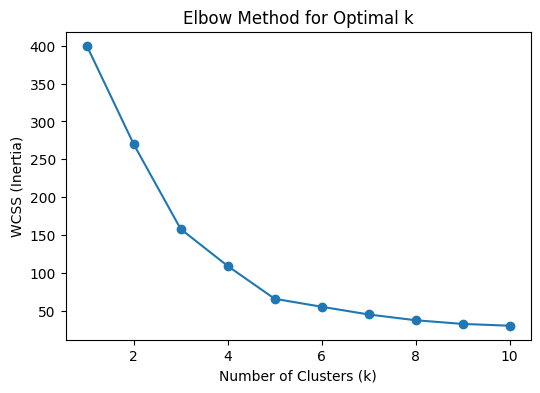

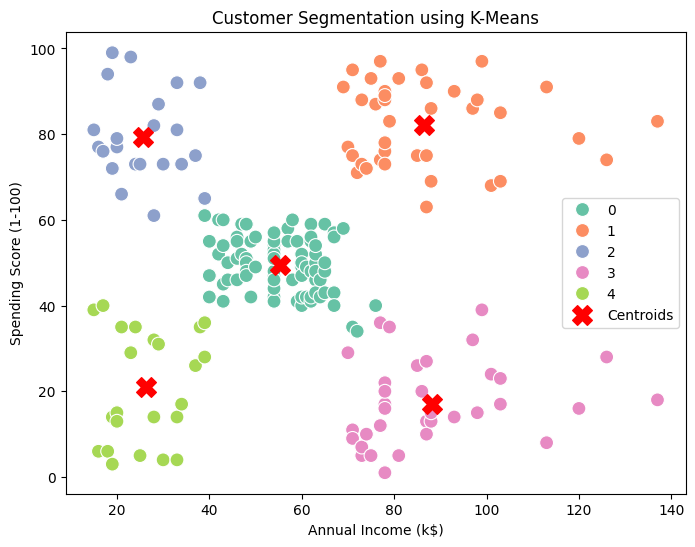

Cluster Counts:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

Cluster Means:


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


In [1]:
# ==========================================
# Customer Segmentation using K-Means
# Mall Customers Dataset (Kaggle)
# ==========================================

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files

# ------------------------------------------
# Step 2: Upload Dataset (Mall_Customers.csv from Kaggle)
# ------------------------------------------
print("📂 Upload Mall_Customers.csv file (Kaggle dataset)")
uploaded = files.upload()

# Load dataset
df = pd.read_csv("Mall_Customers.csv")
print("Dataset Shape:", df.shape)
display(df.head())

# ------------------------------------------
# Step 3: Select Features
# ------------------------------------------
# We'll cluster based on Annual Income & Spending Score
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------------
# Step 4: Elbow Method to find optimal k
# ------------------------------------------
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

# ------------------------------------------
# Step 5: Apply K-Means (choose k=5 as common for this dataset)
# ------------------------------------------
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# ------------------------------------------
# Step 6: Visualize Clusters
# ------------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Annual Income (k$)", y="Spending Score (1-100)",
    hue="Cluster", palette="Set2", data=df, s=100
)
plt.scatter(
    scaler.inverse_transform(kmeans.cluster_centers_)[:,0],
    scaler.inverse_transform(kmeans.cluster_centers_)[:,1],
    c="red", marker="X", s=200, label="Centroids"
)
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()

# ------------------------------------------
# Step 7: Cluster Insights
# ------------------------------------------
print("Cluster Counts:")
print(df["Cluster"].value_counts())

print("\nCluster Means:")
display(df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean())
